In [1]:
from sklearn.decomposition import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.manifold import *
from umap import UMAP
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ridge_regression_coefficients_all_countries.csv', index_col = 0)

In [5]:
df.head()

,Best Alpha,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Score,Export_GDP_Correlation
Country,,,,,,,
BDI,0.01,0.001293,-0.000388,0.000449,-2.183857e-07,0.862419,0.664439
BFA,0.01,0.019002,-0.002105,0.001540,1.803168e-03,0.974553,0.951462
BGD,0.01,0.075913,-0.030418,0.033052,1.773468e-02,0.983529,0.982825
BHR,0.01,0.006992,-0.020819,0.006354,7.328568e-03,0.907860,0.926710
BHS,0.01,0.000291,-0.003714,0.001493,-1.048423e-03,0.758223,-0.676031


In [6]:
df.drop(columns = ['Best Alpha', 'Score', 'Export_GDP_Correlation'], inplace = True)

In [7]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,0.001293,-0.000388,0.000449,-2.183857e-07
BFA,0.019002,-0.002105,0.001540,1.803168e-03
BGD,0.075913,-0.030418,0.033052,1.773468e-02
BHR,0.006992,-0.020819,0.006354,7.328568e-03
BHS,0.000291,-0.003714,0.001493,-1.048423e-03
...,...,...,...,...
VCT,0.000001,-0.000465,0.000188,-2.984769e-05
VUT,0.000023,-0.000517,0.000162,7.897728e-06
WSM,0.000003,-0.000153,0.000174,1.758584e-05


# Standard Scaler for each row 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.T).T

In [9]:
df_scaled = pd.DataFrame(df_scaled, index = df.index, columns = df.columns)
df_scaled


,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408
BFA,1.701016,-0.874187,-0.429495,-0.397335
BGD,1.364102,-1.433729,0.236337,-0.166710
BHR,0.585473,-1.731314,0.532307,0.613534
BHS,0.534892,-1.533975,1.155944,-0.156861
...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024
VUT,0.401388,-1.684873,0.938749,0.344735
WSM,-0.062688,-1.412328,1.413364,0.061652


In [10]:
df = df_scaled
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408
BFA,1.701016,-0.874187,-0.429495,-0.397335
BGD,1.364102,-1.433729,0.236337,-0.166710
BHR,0.585473,-1.731314,0.532307,0.613534
BHS,0.534892,-1.533975,1.155944,-0.156861
...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024
VUT,0.401388,-1.684873,0.938749,0.344735
WSM,-0.062688,-1.412328,1.413364,0.061652


# KMeans clustering for Coefficients 

In [11]:
df_coef = df.copy()

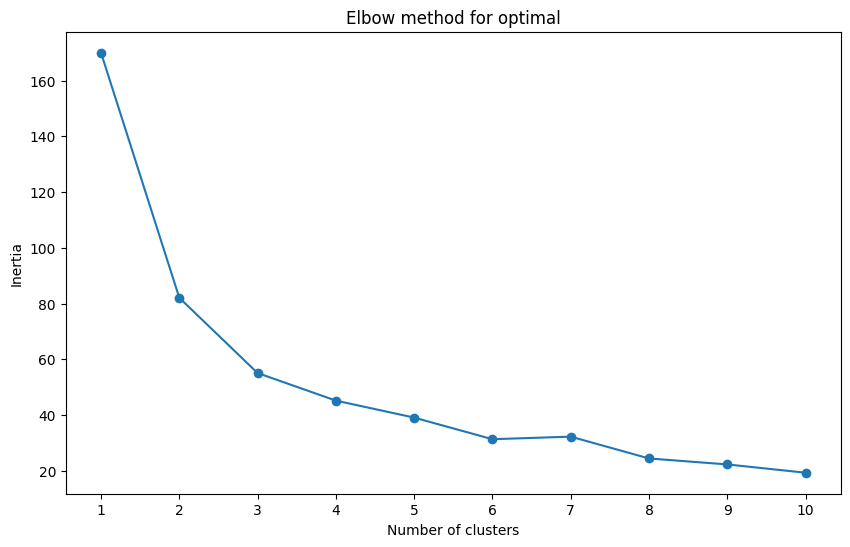

In [12]:
from sklearn.cluster import KMeans
inertia_values = []

cluster_range = range(1, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(df_coef)
    inertia_values.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [18]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_coef['Cluster'] = kmeans.fit_predict(df_coef)

In [19]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_coef.drop(columns=['Cluster']), df_coef['Cluster'])
print("Silhouette Score:", ((sil_score + 1) / 2) * 100)

Silhouette Score: 66.60556650813194


In [20]:
df_coef.Cluster.value_counts()

Cluster
1    23
0    22
2    21
3    10
4     9
5     5
6     2
Name: count, dtype: int64

# Dimensionality Reduction

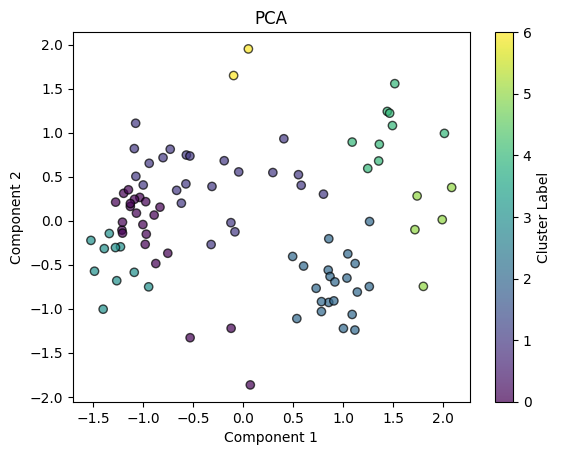

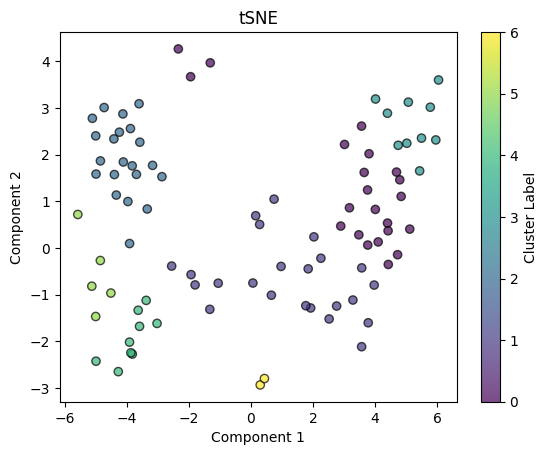

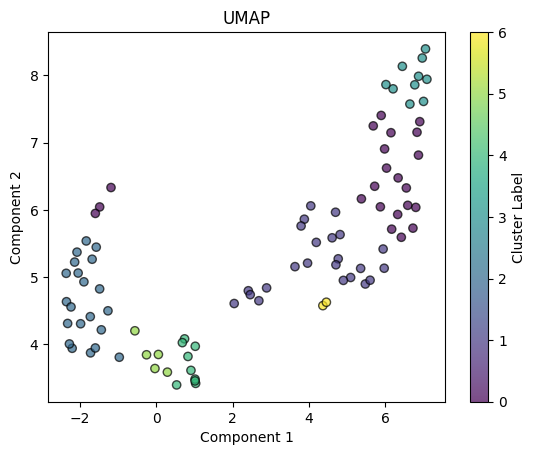

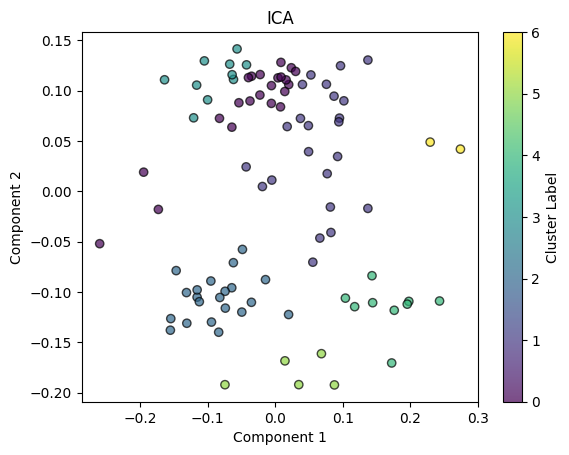

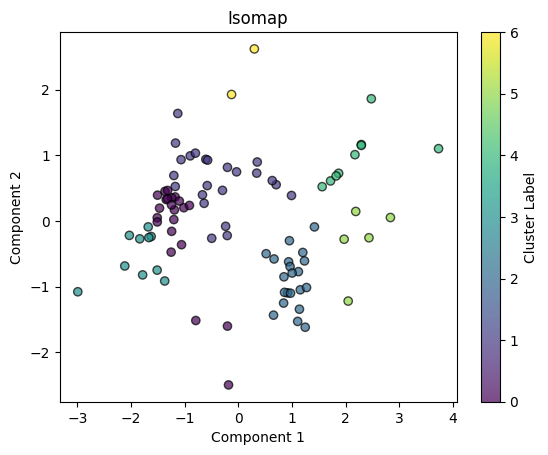

In [21]:

def visualize_dim_red(name, alg, data, clusters):
    al = alg(n_components=2)
    tr = al.fit_transform(data)

    plt.scatter(tr[:, 0], tr[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')

    plt.title(name)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

algs = {'PCA': PCA, 'tSNE': TSNE, 'UMAP': UMAP, 'ICA': FastICA, 'Isomap': Isomap}

 
clusters = df_coef['Cluster']


df_features = df_coef.drop(columns=['Cluster'])


for name, alg in algs.items():
    visualize_dim_red(name, alg, df_features, clusters)


In [17]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408
BFA,1.701016,-0.874187,-0.429495,-0.397335
BGD,1.364102,-1.433729,0.236337,-0.166710
BHR,0.585473,-1.731314,0.532307,0.613534
BHS,0.534892,-1.533975,1.155944,-0.156861
...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024
VUT,0.401388,-1.684873,0.938749,0.344735
WSM,-0.062688,-1.412328,1.413364,0.061652


In [22]:
df_coef

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster
Country,,,,,
BDI,1.525885,-1.160802,0.176326,-0.541408,0
BFA,1.701016,-0.874187,-0.429495,-0.397335,0
BGD,1.364102,-1.433729,0.236337,-0.166710,1
BHR,0.585473,-1.731314,0.532307,0.613534,2
BHS,0.534892,-1.533975,1.155944,-0.156861,2
...,...,...,...,...,...
VCT,0.324818,-1.623985,1.104143,0.195024,2
VUT,0.401388,-1.684873,0.938749,0.344735,2
WSM,-0.062688,-1.412328,1.413364,0.061652,2


In [23]:
df_coef.to_csv('clustered_data.csv')

# Cluster Dimentionality reduction of PCA

In [24]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df)
df_pca

array([[-7.54027826e-01, -3.69461662e-01, -2.22695075e-01],
       [-1.03409691e+00,  2.64796951e-01, -8.17262104e-02],
       [-3.20339330e-01, -2.70133655e-01, -4.38822481e-01],
       [ 8.57349273e-01, -2.04955254e-01, -4.39198435e-01],
       [ 5.37536779e-01, -1.11172087e+00, -1.23874297e-01],
       [ 1.00388732e+00, -1.22383121e+00,  1.44744666e-01],
       [-1.26503147e+00, -6.81387147e-01,  3.95916978e-01],
       [-9.99897036e-01,  4.05870354e-01, -8.82523848e-02],
       [ 7.18641471e-02, -1.86512525e+00,  1.10831942e+00],
       [ 1.35677721e+00,  6.78606131e-01, -1.19842727e-01],
       [ 1.03898908e+00, -6.51230719e-01, -2.35893496e-01],
       [ 8.04276121e-01,  3.01740767e-01, -4.68885959e-01],
       [-3.11836433e-01,  3.89287688e-01, -4.55031980e-01],
       [-1.22173829e-01, -2.20685345e-02, -5.19095182e-01],
       [ 1.51797479e+00,  1.55696045e+00,  9.25445634e-01],
       [-1.21292963e+00, -1.06951933e-01,  9.45383440e-02],
       [-1.20729680e+00, -1.40873768e-01

In [25]:
df_pca = pd.DataFrame(df_pca, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)
df_pca

,Component 1,Component 2,Component 3
Country,,,
BDI,-0.754028,-0.369462,-0.222695
BFA,-1.034097,0.264797,-0.081726
BGD,-0.320339,-0.270134,-0.438822
BHR,0.857349,-0.204955,-0.439198
BHS,0.537537,-1.111721,-0.123874
...,...,...,...
VCT,0.908142,-0.910569,-0.154354
VUT,0.918567,-0.695172,-0.267643
WSM,1.118672,-1.241904,0.238406


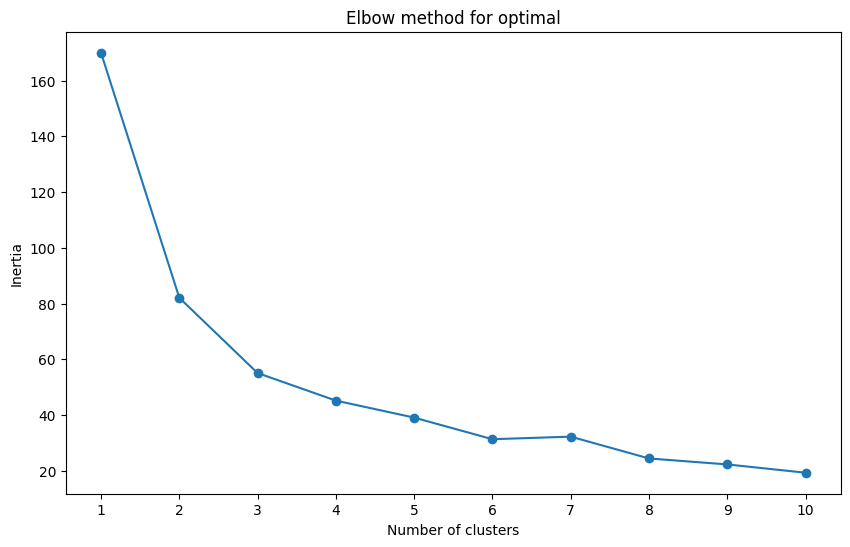

In [26]:
from sklearn.cluster import KMeans
inertia_values = []

cluster_range = range(1, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(df_pca)
    inertia_values.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [27]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

In [28]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_pca.drop(columns=['Cluster']), df_pca['Cluster'])
print("Silhouette Score:", ((sil_score + 1) / 2) * 100)

Silhouette Score: 69.10176276637333


In [29]:
df_pca.Cluster.value_counts()

Cluster
0    22
1    20
6    14
2    13
3    11
5     8
4     4
Name: count, dtype: int64

In [30]:
df_pca

,Component 1,Component 2,Component 3,Cluster
Country,,,,
BDI,-0.754028,-0.369462,-0.222695,6
BFA,-1.034097,0.264797,-0.081726,1
BGD,-0.320339,-0.270134,-0.438822,3
BHR,0.857349,-0.204955,-0.439198,0
BHS,0.537537,-1.111721,-0.123874,0
...,...,...,...,...
VCT,0.908142,-0.910569,-0.154354,0
VUT,0.918567,-0.695172,-0.267643,0
WSM,1.118672,-1.241904,0.238406,0


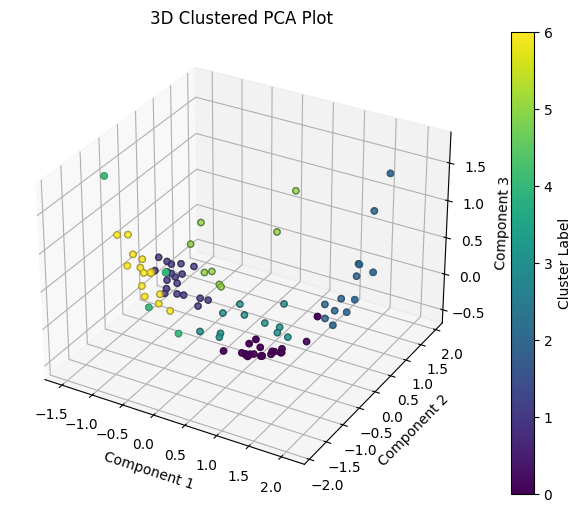

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
           c=df_pca['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')


ax.set_title("3D Clustered PCA Plot")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

cbar = plt.colorbar(ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
                               c=df_pca['Cluster'], cmap='viridis'))
cbar.set_label("Cluster Label")

plt.show()


In [32]:
df_pca.to_csv('clustered_data_pca.csv')

# Cluster Dimentionality reduction of UMAP

In [33]:
umap = UMAP(n_components = 3, random_state = 42)
df_umap = umap.fit_transform(df)
df_umap

array([[17.219656 ,  4.677003 , 10.044879 ],
       [16.478518 ,  3.5405862,  9.47898  ],
       [15.594325 ,  5.1886563,  9.210308 ],
       [13.423327 ,  7.477271 ,  5.777756 ],
       [13.8574915,  8.840233 ,  5.2858114],
       [13.42861  ,  8.892151 ,  5.6356688],
       [18.314106 ,  4.5620136, 10.523607 ],
       [16.10749  ,  3.3682218,  9.140265 ],
       [13.982803 ,  8.975569 ,  5.664415 ],
       [13.109376 ,  6.3667607,  7.435021 ],
       [13.316961 ,  7.971121 ,  5.316845 ],
       [14.029033 ,  6.057257 ,  7.7422624],
       [15.040602 ,  4.843723 ,  8.8079605],
       [15.28932  ,  5.2610364,  9.011379 ],
       [12.847647 ,  6.0492573,  7.2049675],
       [17.690786 ,  3.8219092, 10.243288 ],
       [17.716309 ,  3.820307 , 10.301221 ],
       [12.755397 ,  6.2729883,  6.9381766],
       [17.857561 ,  4.1726723, 10.361015 ],
       [13.2983055,  7.5978336,  5.705889 ],
       [13.279975 ,  7.1555195,  6.358104 ],
       [13.2092905,  8.325653 ,  5.566044 ],
       [14

In [34]:
df_umap = pd.DataFrame(df_umap, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)

In [35]:
df_umap

,Component 1,Component 2,Component 3
Country,,,
BDI,17.219656,4.677003,10.044879
BFA,16.478518,3.540586,9.478980
BGD,15.594325,5.188656,9.210308
BHR,13.423327,7.477271,5.777756
BHS,13.857491,8.840233,5.285811
...,...,...,...
VCT,13.536843,8.517563,5.180171
VUT,13.600472,8.123752,5.073294
WSM,13.370344,8.830618,5.634864


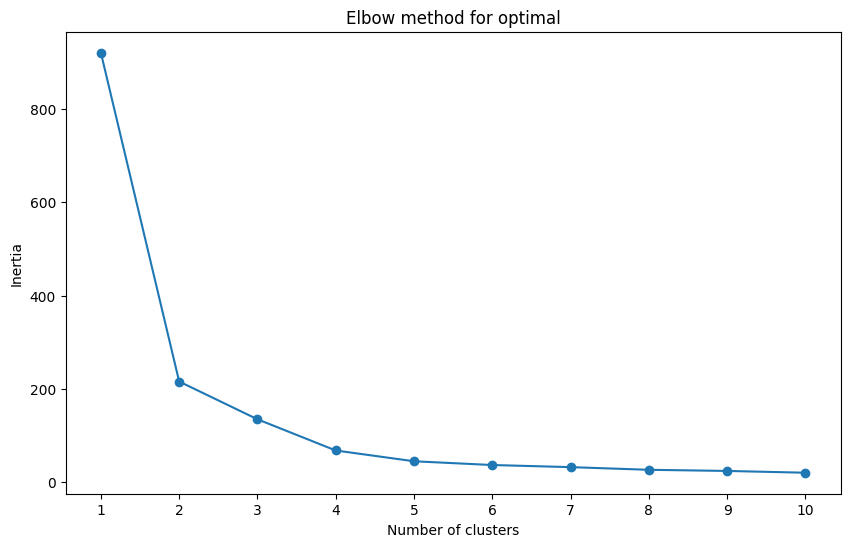

In [36]:
inertia_values = []
cluster_range = range(1,11)
for k in cluster_range:
    model = KMeans(n_clusters = k, n_init='auto', random_state=42)
    model.fit_transform(df_umap)
    inertia_values.append(model.inertia_)
    
    
plt.figure(figsize = (10, 6))
plt.plot(cluster_range, inertia_values, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [41]:
n_cluster = 7
kmeans = KMeans(n_clusters = n_cluster, n_init='auto', random_state = 42)
df_umap['cluster'] = kmeans.fit_predict(df_umap)

In [42]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_umap.drop(columns = ['cluster']), df_umap['cluster'])
print('silhouette score:', ((sil_score + 1)/2)* 100)

silhouette score: 69.83045041561127


In [43]:
df_umap.cluster.value_counts()

cluster
3    21
0    17
2    14
4    12
5    11
1    11
6     6
Name: count, dtype: int64

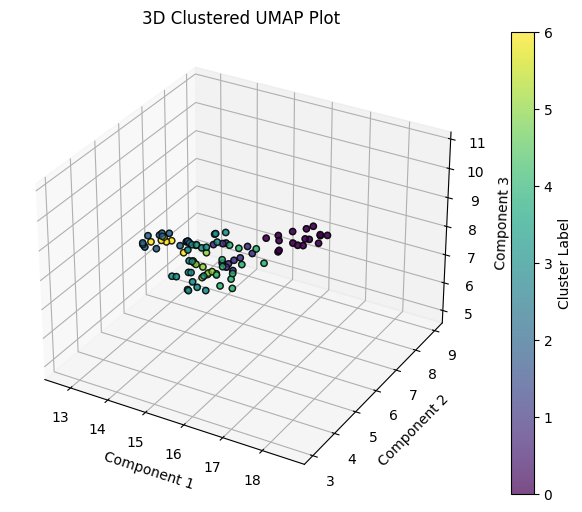

In [44]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_umap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_umap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered UMAP Plot')

plt.show()

In [45]:
df_umap.to_csv('clustered_data_umap.csv')

# Cluster dimentionality reduction of Isomap

In [46]:
isomap = Isomap(n_components=3) 
df_isomap = isomap.fit_transform(df)
df_isomap

array([[-1.05808974e+00, -3.60166310e-01, -1.84983498e-01],
       [-1.17756444e+00,  3.67305246e-01,  6.23064591e-03],
       [-4.95138111e-01, -2.62828036e-01, -5.76538086e-01],
       [ 9.54207947e-01, -2.99403995e-01, -2.16902316e-01],
       [ 6.57577903e-01, -1.43366994e+00,  1.14423767e-01],
       [ 1.10800433e+00, -1.52904365e+00,  1.07373517e-02],
       [-1.78385589e+00, -8.20300200e-01,  2.30052678e-01],
       [-1.17559761e+00,  5.26107432e-01,  1.33420857e-01],
       [-1.81676187e-01, -2.49639111e+00,  1.18870043e+00],
       [ 1.72096017e+00,  6.10929888e-01, -1.28065546e-01],
       [ 1.12172786e+00, -7.70778839e-01, -7.45593017e-02],
       [ 9.92870002e-01,  3.89257526e-01, -1.49806919e-01],
       [-2.94309981e-01,  4.67467401e-01, -5.62056903e-01],
       [-2.35850255e-01, -7.99547029e-02, -7.53869636e-01],
       [ 2.48148918e+00,  1.86264211e+00,  9.78584898e-01],
       [-1.51118639e+00,  5.09853224e-02,  1.22939839e-01],
       [-1.51073758e+00, -1.38422822e-02

In [47]:
df_isomap = pd.DataFrame(df_isomap, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)

In [48]:
df_isomap

,Component 1,Component 2,Component 3
Country,,,
BDI,-1.058090,-0.360166,-0.184983
BFA,-1.177564,0.367305,0.006231
BGD,-0.495138,-0.262828,-0.576538
BHR,0.954208,-0.299404,-0.216902
BHS,0.657578,-1.433670,0.114424
...,...,...,...
VCT,0.974631,-1.099247,-0.039564
VUT,1.004617,-0.791836,-0.063889
WSM,1.248534,-1.617481,0.057818


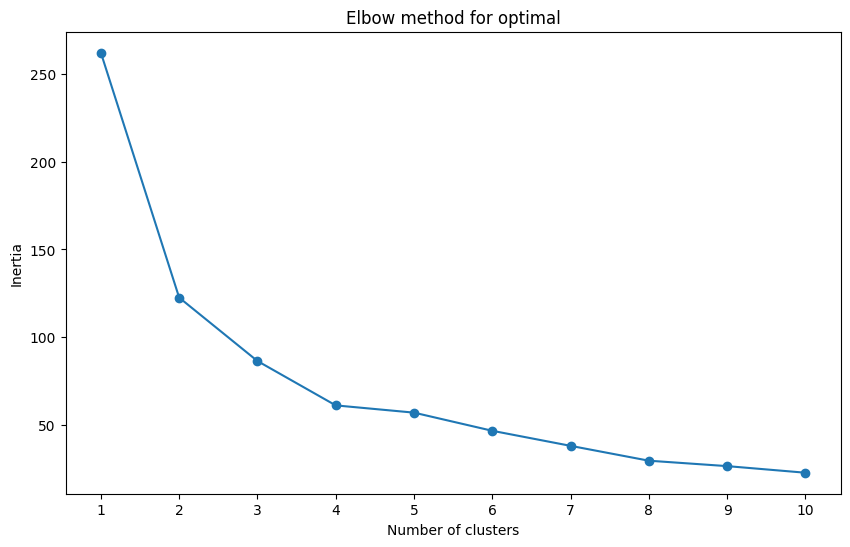

In [49]:
inertia_values = []
cluster_range = range(1,11)
for k in cluster_range:
    model = KMeans(n_clusters = k, n_init='auto', random_state=42)
    model.fit_transform(df_isomap)
    inertia_values.append(model.inertia_)
    
    
plt.figure(figsize = (10, 6))
plt.plot(cluster_range, inertia_values, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [50]:
n_cluster = 7
kmeans = KMeans(n_clusters = n_cluster, n_init='auto', random_state = 42)
df_isomap['cluster'] = kmeans.fit_predict(df_isomap)

In [51]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_isomap.drop(columns = ['cluster']), df_isomap['cluster'])
print('silhouette score:', ((sil_score + 1)/2)* 100)

silhouette score: 71.78392197836027


In [52]:
df_isomap.cluster.value_counts()

cluster
6    26
1    21
5    13
4    13
3     9
0     8
2     2
Name: count, dtype: int64

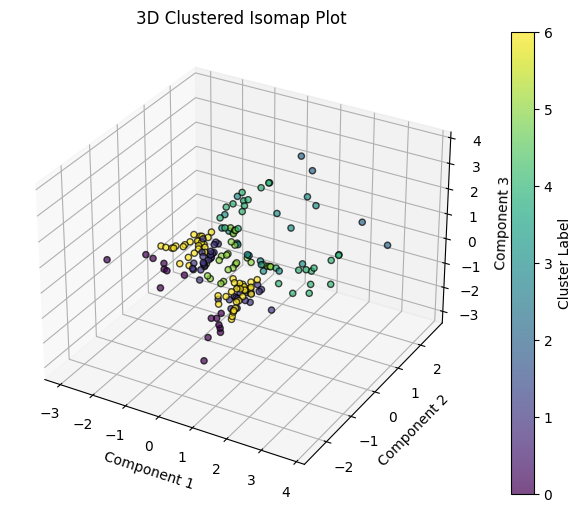

In [53]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_isomap.iloc[:,2], df_isomap.iloc[:,1], df_isomap.iloc[:,0], c = df_isomap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_isomap.iloc[:,0], df_isomap.iloc[:,1], df_isomap.iloc[:,2], c = df_isomap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered Isomap Plot')

plt.show()

In [54]:
df_isomap.to_csv('clustered_data_isomap.csv')